# Predicting the SOLD PRICE (Auction Price) of Players

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import pyplot as plt
import seaborn as sn
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split

In [12]:
mba_salary_df = pd.read_csv( 'MBA Salary.csv' )
mba_salary_df.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [13]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [14]:
#Creating Feature Set(X) and Outcome Variable(Y)
import statsmodels.api as sm
X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [15]:
Y = mba_salary_df['Salary']

In [16]:
# Splitting the dataset into training and validation sets

In [17]:
train_X, test_X, train_y, test_y = train_test_split( X ,
Y,
train_size = 0.8,
random_state = 100 )

In [18]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

In [19]:
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [20]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2022-03-26 10:53      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

### Residual Anlalysis

In [23]:
# Checking Normality
#mba_salary_resid = mba_salary_lm.resid
#probplot = sm.ProbPlot( mba_salary_resid)
#plt.figure( figsize = (10, 6) )
#probplot.ppplot( line='45')
#plt.title( "Normal P-P Plot of Regression Standardized Residuals" )
#plt.show()

### Test of Homoscedasticity
1. residuals have constant variance (homoscedasticity) across different values of the predicted value (Y). 
2. The homoscedasticity can be observed by drawing a residual plot, which is a plot between standardized residual value and standardized predicted value. 
3. If there is heteroscedasticity (non-constant variance of residuals), then a funnel type shape in the residual plot can be expected.

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

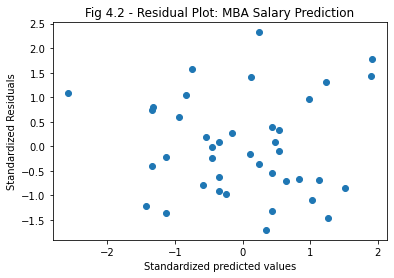

In [25]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ),
get_standardized_values( mba_salary_resid ) )
plt.title( "Fig 4.2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

## Outlier Analysis

In [142]:
from scipy.stats import zscore

In [143]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )

In [145]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


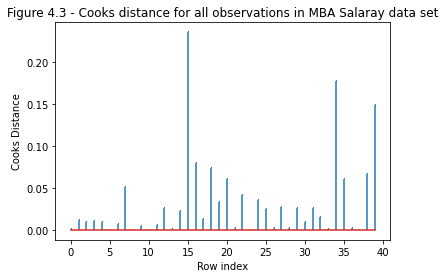

In [147]:
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in MBA Salaray data set" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

## Leverage Values
1. Leverage value of an observation measures the influence of that observation on the overall fit of the regression function. 
2. Leverage value of more than 3(k + 1)/n is treated as highly influential observation, where k is the number of features in the model and n is the sample size.

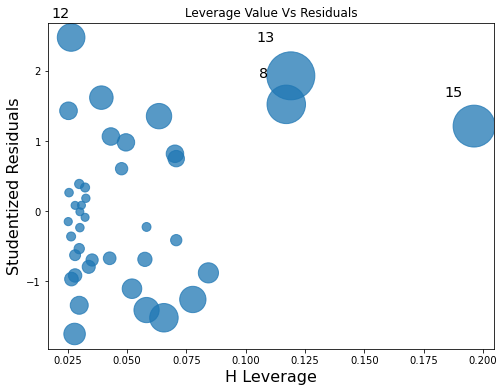

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( mba_salary_lm, ax = ax )
plt.title( "Leverage Value Vs Residuals")
plt.show();

#the size of the circle is proportional to the product of residual and leverage value. The
#larger the circle, the larger is the residual and hence influence of the observation.

## Making prediction using the model

In [149]:
pred_y = mba_salary_lm.predict( test_X )

In [150]:
from sklearn.metrics import r2_score, mean_squared_error

In [151]:
np.abs(r2_score(test_y, pred_y))

0.15664584974230378

In [152]:
np.sqrt(mean_squared_error(test_y, pred_y))

73458.04348346894

In [153]:
#Calculating prediction intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Predict the y values
pred_y = mba_salary_lm.predict( test_X )
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm,
test_X,
alpha = 0.1)
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'],
'pred_y': pred_y,
'pred_y_left': pred_y_low,
'pred_y_right': pred_y_high } )

In [154]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182


# Multiple Linear Regression

In [42]:
ipl_auction_df = pd.read_csv('IPL IMB381IPL2013.csv')

In [43]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [44]:
X_features = ipl_auction_df.columns

In [45]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',
'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S',
'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS',
'AVE-BL', 'ECON', 'SR-BL']

In [46]:
# Encoding Categorical Features

In [47]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [48]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [49]:
categorical_features = [ 'AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [50]:
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features],
columns = categorical_features,
drop_first = True )

In [51]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [52]:
X_features = ipl_auction_encoded_df.columns

In [53]:
# Splitting the Dataset into Train and Validation Sets

In [54]:
X = sm.add_constant( ipl_auction_encoded_df )
Y = ipl_auction_df['SOLD PRICE']
train_X, test_X, train_y, test_y = train_test_split( X ,
Y,
train_size = 0.8,
random_state = 42 )

In [55]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2022-03-26 08:01        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

As per the p-value (<0.05), only the features HS, AGE_2, AVE and COUNTRY_ENG have come out significant. The model says that none of the other features are influencing SOLD PRICE (at a significance value of 0.05). This is not very intuitive and could be a result of multi-collinearity effect of variables.

In [58]:
def get_vif_factors(X):
    X_matrix = X.values
    vif = [ variance_inflation_factor( X_matrix, i ) 
                                   for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [59]:
vif_factors = get_vif_factors( X[X_features] )
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [60]:
# Checking Correlation of Columns with Large VIFs

In [61]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

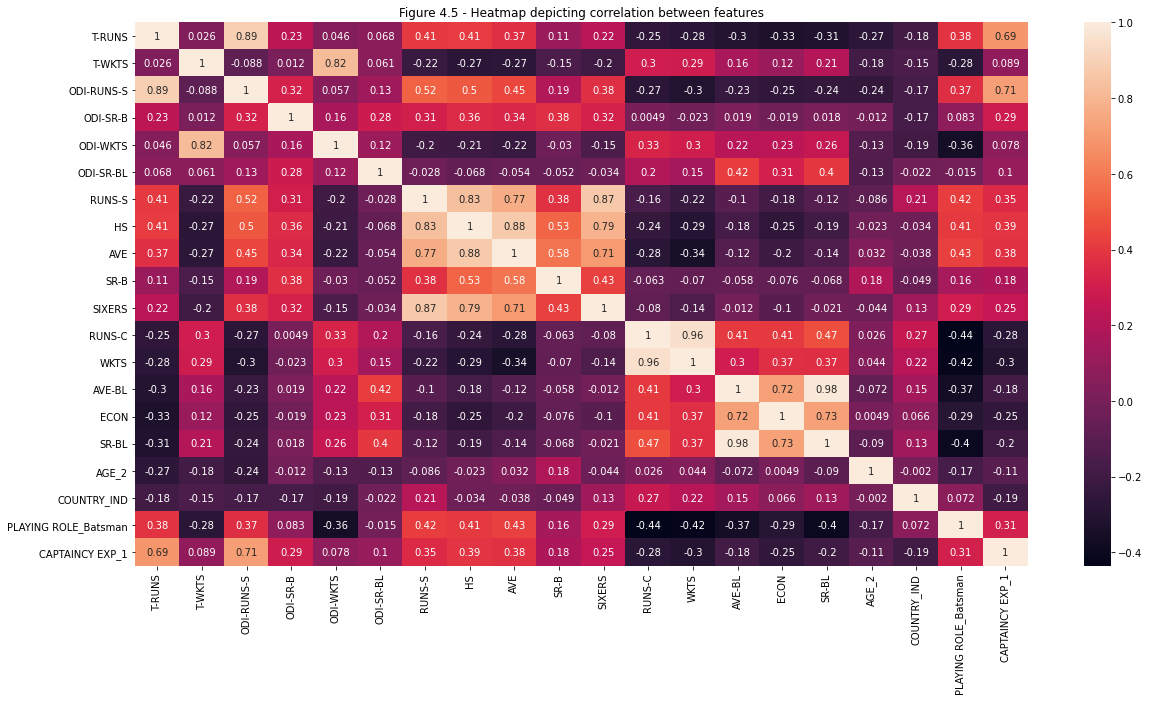

In [68]:
plt.figure( figsize = (20,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title( "Figure 4.5 - Heatmap depicting correlation between features");

In [69]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS',
'AVE', 'RUNS-C', 'SR-B', 'AVE-BL',
'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [70]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )

In [71]:
get_vif_factors( X[X_new_features] )

,column,vif
0,COUNTRY_NZ,1.173418
1,ODI-SR-BL,2.822148
2,AGE_3,1.779861
3,COUNTRY_WI,1.194093
4,WKTS,2.883101
5,COUNTRY_ENG,1.131869
6,COUNTRY_SA,1.416657
7,COUNTRY_BAN,1.094293
8,ODI-WKTS,2.742889
9,SIXERS,2.397409


## Building a new model after removing multicollinearity

In [73]:
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_y, train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2022-03-26 08:08   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [90]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1']
train_X = train_X[significant_vars]
ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2022-03-26 10:09 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

In [91]:
# Residual Analysis

In [92]:
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();

In [139]:
def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values(fitted),
                get_standardized_values(resid))
    plt.title(title)
    plt.xlabel("Standardized predicted values")
    plt.ylabel("Standardized residual values")
    plt.show()

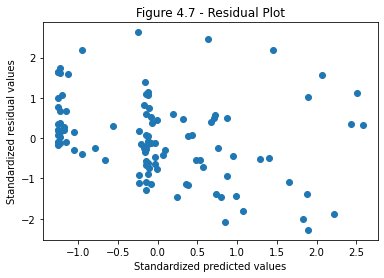

In [102]:
plot_resid_fitted( ipl_model_3.fittedvalues, ipl_model_3.resid, "Figure 4.7 - Residual Plot")

In [103]:
#Detecting Influencers

In [104]:
k = train_X.shape[1]
n = train_X.shape[0]

In [105]:
print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 4  and number of observations: 104


In [106]:
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Cutoff for leverage value:  0.144


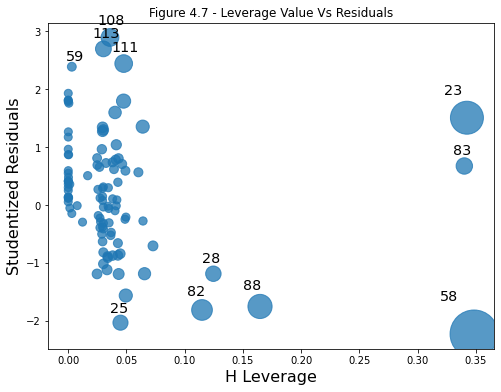

In [108]:
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ipl_model_3, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

In [109]:
ipl_auction_df[ipl_auction_df.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


In [110]:
train_X_new = train_X.drop( [23, 58, 83], axis = 0)
train_y_new = train_y.drop( [23, 58, 83], axis = 0)

In [111]:
train_y = np.sqrt( train_y )

In [112]:
ipl_model_4 = sm.OLS(train_y, train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2022-03-26 10:23 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

In [114]:
pred_y = np.power( ipl_model_4.predict( test_X[train_X.columns] ), 2)

In [115]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

496151.18122558104

In [116]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

0.44